In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [2]:
audio_file = "../wavs/q3_audio.wav"
y, sr = librosa.load(audio_file)
print(f"sampling rate = {sr} and no of sample = {len(y)}")
print(f"duration = {len(y)/sr}")
print(f"frames in 20ms = {20*sr/1000}")

sampling rate = 22050 and no of sample = 238030
duration = 10.79501133786848
frames in 20ms = 441.0


# Question 3

In [3]:
def short_fft(y, sr, window_dur, window_shape, shift_dur):
    i = 0
    short_ffts = []

    frame_length = int(np.round((sr * window_dur) / 1000))
    shift_length = int(np.round((sr * shift_dur) / 1000))

    while i < len(y):
        frame = y[i:i + frame_length]

        if window_shape == 'hann':
            window = np.hanning(frame_length)
        elif window_shape == 'rect':
            window = np.ones(frame_length)
        
        if(len(frame)<frame_length):
            frame = np.concatenate((frame,np.zeros(frame_length-len(frame))),axis=0)
        
        frame = frame * window  # Apply the window function
        fft = np.abs(np.fft.fft(frame))
        short_ffts.append(fft[:(frame_length // 2)+1])

        i = i + shift_length

    short_ffts = np.array(short_ffts).T
    short_ffts = short_ffts / np.max(short_ffts)  # Normalize the FFT
    # magnitude to dB scale
    db_spectrogram = 20 * np.log10((short_ffts+0.0000001))
    
    return db_spectrogram


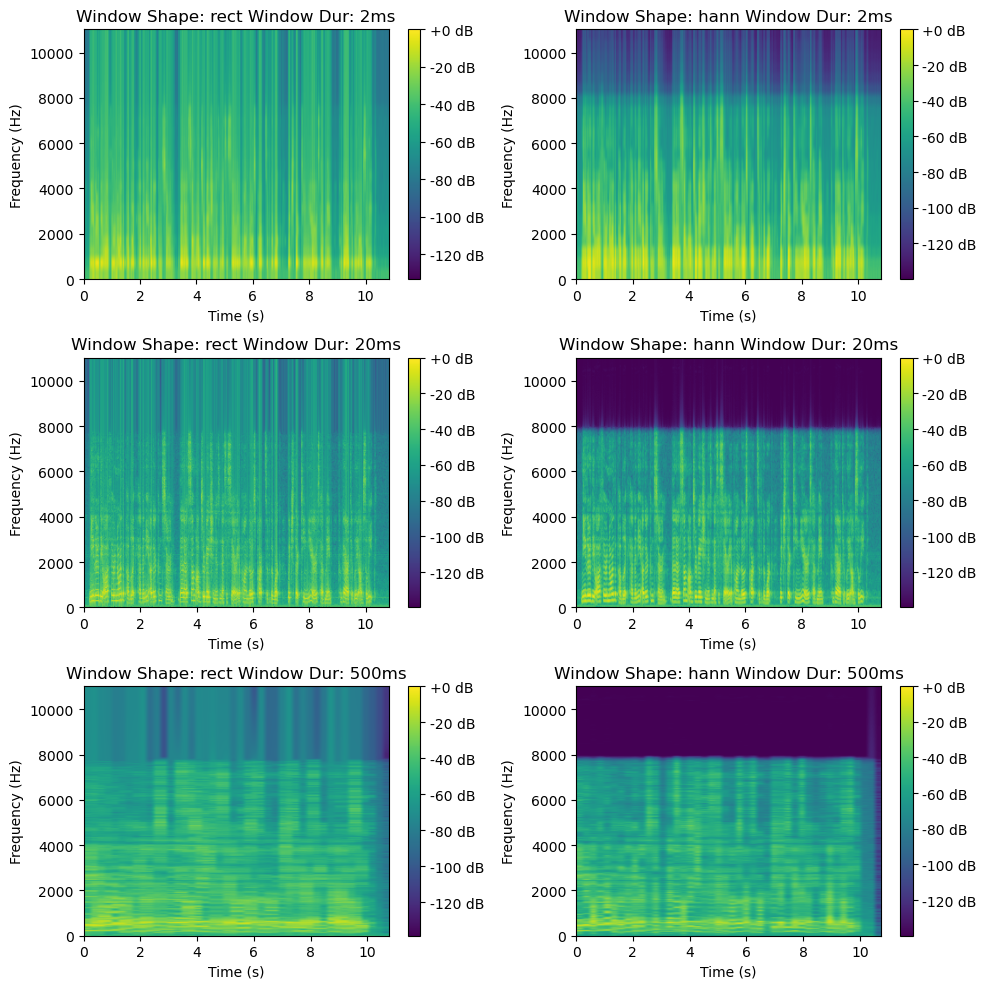

In [4]:
fig, axes = plt.subplots(3, 2,figsize = (10,10))

db_spectrogram = []
time_vector = []
window=[]
for window_dur in [2,20,500]:
    for shape in ["rect","hann"]:
        temp = short_fft(y,sr,window_dur,shape,int(window_dur//2))
        db_spectrogram.append(temp)
        num_frames=temp.shape[1]
        time_vector.append(np.arange(0, num_frames) * (int(window_dur//2) / 1000.0))
        window.append([shape,window_dur])

for i, ax in enumerate(axes.ravel()):
    im=ax.imshow(db_spectrogram[i], cmap='viridis', origin='lower', aspect='auto', extent=[0, time_vector[i][-1], 0, sr / 2])
    plt.colorbar(im, ax=ax, format="%+2.0f dB")
    ax.set_title(f"Window Shape: {window[i][0]} Window Dur: {window[i][1]}ms")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (Hz)")
    
plt.tight_layout()
plt.show()


### a) Effect of Window Length
 - By using a large window length one can get all the frequency information, but we loose the time resolution
 - Similarly by using small window length we get high time resolution but loose the frequnecy information

### b) Effect of Window Shape
 - When we do rectangular windowing, there will be additional high frequency components added to the spectrogram due to sharp edged of the window
  - By using hanning window we can preserve the frequency characteristics of the signal
